# Project: LEGO Pricing Regression

This project was an assignment whilst participating in Data analytics: Elevate course offered by the education institution, Academy Xi. This project applies knowledge of writing SQL query, python and various libraries ( pandas, numpy, matplotlib, sklearn, seaborn, skipy, statsmodels).

**Files**
 - 'legos.db' is an sql database containing over 700 Lego sets released in the past, including attributes of those sets.
 - 'LegoPricingGH.ipynb'is a jupyter notebook containing the code.
 
### Data
The data is an sql database containing over 700 LEGO sets released in the past, including attributes of those sets as well as their prices.
The data will be used in its entirety as a training dataset and will not be split into two subsets for training & testing.
We do not worry about inflation or differences in currency; just predict the same kinds of prices as are present in the past data, which have already been converted to USD.

### Business Understanding
This project is to develop a pricing algorithm in order to analyze the value of individual lego pieces.

The primary purpose of this algorithm is *inferential*, meaning that **the model should be able to tell us something about the relationship between the attributes of a LEGO set and its price**. 


### Analysis Requirements
#### 1. Data Exploration and Cleaning
During the data exploration phase, the datatypes of columns should be checked, the distribution of the target variable should be inspected, null values should be either removed or replaced, and duplicates (in most cases)  should be dropped. 
#### 2. Create a Baseline Model
In order to evaluate how well a simple linear regression model is, is understanding the dependent variable. We will begin by first creating a model that predicts the mean of the dependent variable for every observation. Predicting the mean of 'list_price' can be considered a highly naive model. If our simple linear regression model performs worse than this naive approach, we can safely say that it is not a very good model. 
#### 3. Interpret a Correlation Heatmap
To develop a simple linear regression model, we will identify the independent variable that is most correlated with the dependent variable. To do this this we will plot a correlation heatmap to identify the variable most correlated with 'list_price'.
#### 4. Build a Simple Linear Regression Model
Now, create a linear regression model using the 'statsmodels' library where the most correlated feature is used as the independent variable and the dependent variable is properly set. 
#### 5. Interpret the Simple Linear Regression Model
Once the model has been fit, the coefficient for our independent variable, its p-value, and the coefficient confidence interval should be interpeted.  We should ask ourselves whether or not the relationship in the model seems plausible. 
#### 6. Evaluate the Simple Linear Regression Model
Before we can make a final assessment of the model, we need to compare its metrics with the baseline model created in step one, and we will need to check the assumptions of linear regression.

# Precursor: Load the Data

The entity relational diagram (E.R.D) for the legos database is displayed here![Entity Relational Diagram](erd.png) 

In [37]:
# import python libraries
import sqlite3 #RDBMS
import pandas as pd  # data analysis
import matplotlib.pyplot as plt #visualisations in Python
%matplotlib inline

In [38]:
#Open up a connection to the legos database
#Write an sql query to join all three tables together
#Run the sql query and load the joined tables into a pandas dataframe

conn = sqlite3.connect('legos.db')

sql_query = """
SELECT *
FROM difficulty
JOIN product_info
    USING([Prod Id])
JOIN metrics
    USING([Prod Id]);
    """
df = pd.read_sql(sql_query,conn)

# 1. Data Exploration and Cleaning

**Analysis requirements: During the data exploration phase, the datatypes of columns should be checked, the distribution of the target variable should be inspected, null values should be either removed or replaced, and duplicates (in most cases)should be dropped.**

We will break this section into small subsections (a-f).

## a) Inpsect the dataframe & produce high level descriptive data

In [39]:
#output the first five rows.
df.head()

,Prod Id,Min Age,Max Age,Difficulty Level,Set Name,Prod Desc,Theme Name,Piece Count,Num Reviews,Star Rating,List Price
0,60123,7.0,12.0,1,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,3.0,4.3,$49.99
1,71246,7.0,14.0,1,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,3.0,4.7,$30.362
2,10616,1.5,5.0,1,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,3.0,5.0,$19.99
3,31079,8.0,12.0,1,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,5.0,4.4,$34.99
4,42057,8.0,14.0,1,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,9.0,4.7,$19.99


Produce high-level descriptive information about the data

In [40]:
df.shape

(884, 11)

In [41]:
df.columns

Index(['Prod Id', 'Min Age', 'Max Age', 'Difficulty Level', 'Set Name',
       'Prod Desc', 'Theme Name', 'Piece Count', 'Num Reviews', 'Star Rating',
       'List Price'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prod Id           884 non-null    int64  
 1   Min Age           884 non-null    float64
 2   Max Age           884 non-null    float64
 3   Difficulty Level  884 non-null    int64  
 4   Set Name          884 non-null    object 
 5   Prod Desc         864 non-null    object 
 6   Theme Name        884 non-null    object 
 7   Piece Count       884 non-null    int64  
 8   Num Reviews       781 non-null    float64
 9   Star Rating       781 non-null    float64
 10  List Price        844 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 76.1+ KB


In [43]:
df.describe()

,Prod Id,Min Age,Max Age,Difficulty Level,Piece Count,Num Reviews,Star Rating
count,8.840000e+02,884.000000,884.000000,884.000000,884.000000,781.000000,781.000000
mean,5.821184e+04,6.781674,27.785068,1.483032,460.990950,17.610755,4.430602
std,1.388029e+05,2.984551,34.019566,0.796898,928.905788,38.143280,0.592083
min,6.300000e+02,1.500000,3.000000,0.000000,1.000000,1.000000,1.800000
25%,2.113875e+04,5.000000,12.000000,1.000000,88.750000,2.000000,4.100000
50%,4.550550e+04,7.000000,14.000000,2.000000,185.500000,6.000000,4.600000
75%,7.122825e+04,8.000000,14.000000,2.000000,457.750000,13.000000,4.900000
max,2.000431e+06,16.000000,99.000000,4.000000,7541.000000,367.000000,5.000000


## b) Null values
Display the number of null values for each column

In [44]:
print('Columns which have null values',"\n",df.isnull().sum(),'\n')
print('Count of null values:', df.isnull().sum().sum())

Columns which have null values 
 Prod Id               0
Min Age               0
Max Age               0
Difficulty Level      0
Set Name              0
Prod Desc            20
Theme Name            0
Piece Count           0
Num Reviews         103
Star Rating         103
List Price           40
dtype: int64 

Count of null values: 266


**Null values exist for our dependent variable**
We have four columns that contain null values. Of those four, 'List Price', which is our dependent variable, is probably the most concerning. We can see there are 40 null values in this column.

In the cell below, we will drop all rows where List Price is null.

In [45]:
df = df.dropna(subset=['List Price'])
print('Remaining columns which have null values',"\n",df.isnull().sum(),'\n')
print("Count of null values (post deleting list 'price nulls'):", df.isnull().sum().sum())

Remaining columns which have null values 
 Prod Id              0
Min Age              0
Max Age              0
Difficulty Level     0
Set Name             0
Prod Desc           20
Theme Name           0
Piece Count          0
Num Reviews         95
Star Rating         95
List Price           0
dtype: int64 

Count of null values (post deleting list 'price nulls'): 210


## c) Reformat column names (for ease)
To make things easier moving forward, we will reformat the column names so spaces have been replaced with underscores and the text has been lowered

In [46]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

#Check the reformatting
assert 'min_age' in df.columns

Index(['prod_id', 'min_age', 'max_age', 'difficulty_level', 'set_name',
       'prod_desc', 'theme_name', 'piece_count', 'num_reviews', 'star_rating',
       'list_price'],
      dtype='object')


## d) Datatypes of columns
Check the datatypes of the columns in the dataframe. 
> Remember, the target column and any columns you use as **independent variables *must* have a numeric datatype.** After inspecting the datatypes of the columns, we will need convert columns to numeric where necessary. 

In [47]:
# convert independent variable into numeric datatype 
df['list_price'] = df['list_price'].str.replace('$','',regex=True)
df['list_price'] = df['list_price'].astype(float, errors = 'ignore')
df['list_price'] 

0      49.990
1      30.362
2      19.990
3      34.990
4      19.990
        ...  
877     9.990
878     9.990
879     9.990
880    19.990
882    19.990
Name: list_price, Length: 844, dtype: float64

In [12]:
# Ensure potential independent variables are numeric datayypes
df['min_age'].astype(float)
df['max_age'].astype(float)
df['difficulty_level'].astype(int)
df['piece_count'].astype(int)
df['num_reviews'].astype(float)
df['star_rating'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 882
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   prod_id           844 non-null    int64  
 1   min_age           844 non-null    float64
 2   max_age           844 non-null    float64
 3   difficulty_level  844 non-null    int64  
 4   set_name          844 non-null    object 
 5   prod_desc         824 non-null    object 
 6   theme_name        844 non-null    object 
 7   piece_count       844 non-null    int64  
 8   num_reviews       749 non-null    float64
 9   star_rating       749 non-null    float64
 10  list_price        844 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 79.1+ KB


## e) Duplicate rows
Check the number of duplicate rows in the dataframe. If **duplicates are found, we will drop them.**

In [13]:
print("rows*columns:",df.shape) # Rows in dataframe pre deleting duplicates
print("Number of duplicate rows:",df.duplicated().sum())

rows*columns: (844, 11)
Number of duplicate rows: 100


In [14]:
df = df.drop_duplicates()
#df.index = range(len(df))
print('Number of rows in dataframe after deleting duplicate rows:',len(df))

Number of rows in dataframe after deleting duplicate rows: 744


## f) Inspect distribution of the dependent variable
Lets visualise the distribution of the dependent variable 'list price'.

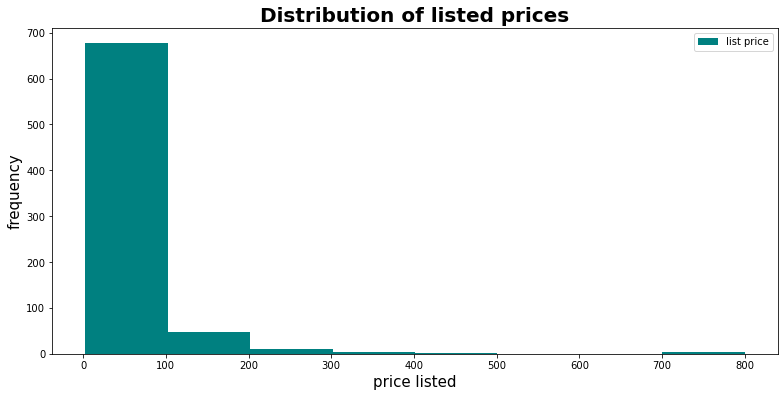

In [15]:
fig,ax = plt.subplots(figsize =(13,6))
ax.hist(df['list_price'],bins=8,color = 'teal')
ax.set_title("Distribution of listed prices", size=20,fontweight='bold')
ax.set_xlabel('price listed', size=15)
ax.set_ylabel('frequency', size=15)
ax.legend(['list price']);

# 2. Create a Baseline Model

**Analysis requirements: In order to evaluate how well a simple linear regression model is, is understanding the dependent variable. We will begin by first creating a model that predicts the mean of the dependent variable for every observation. Predicting the mean of 'list_price' can be considered a highly naive model. If our simple linear regression model (created in Section 4) performs worse than this naive approach, we can safely say that it is not a very good model.**

In order to create a baseline model we complete the following:
1. Calculate the mean of the 'list_price' column in the train dataframe.
2. Once we've calculated the mean of 'list_price', we create a list with the same length as the 'list_price' column where every value in the list is the calculated mean.list_price. We will store this list in the variable 'baseline_preds'.

In [16]:
# Calculate the mean of the list_price column in the train dataframe.
mean = None
baseline_preds = None
train=df
# Calculate the mean of the list_price column in the train dataframe.
mean = train['list_price'].mean()
print('Mean of the list_price column in train dataframe:',mean)  #49.00058198924769
print('length of list_price:',len(train['list_price']))  #744

# Create a list with the same length as the list_price column 
# where every value in the list is the calculated mean.

baseline_preds = []
for i in range(len(train['list_price'])):
    baseline_preds.append(mean)
print('length of baseline_preds:',len(baseline_preds))

Mean of the list_price column in train dataframe: 49.00058198924769
length of list_price: 744
length of baseline_preds: 744


Now that we have baseline predictions, we can use the predictions to calculate **metrics about the model's performance**. 

In [17]:
from sklearn.metrics import r2_score, mean_squared_error

# Pass the list_price column and the baseline_preds list into the function r2_score
baseline_r2 = r2_score(train.list_price, baseline_preds)

# Pass the list_price column and the baseline_preds list 
# into the function mean_squared_error and setting squared to False
baseline_rmse = mean_squared_error(train.list_price, baseline_preds, squared=False)
baseline_mse = mean_squared_error(train.list_price, baseline_preds, squared=True)
print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)
print('Baseline MSE:', baseline_mse)


Baseline R^2:  0.0
Baseline RMSE: 73.60214730890442
Baseline MSE: 5417.276088481665


## Observation 2: Interpret the resulting metrics for the baseline model.
- How is the model explaining the variance of the dependent variable?
- On average, how many dollars off are the models predictions?

R^2 or the coefficient of determination generates a score of 0. This value tells you of the goodness of fit of the regression model. Best possible score any model can predict is 1.0. A constant model, which we have here that predicts the expected value of y using the mean as the predictor, disregarding any input features, get a score of 0.0. If we examine a simple graph (below) we are not making any use of an independent x variable to predict a y. This is an extremely poor model.0% of the variation in list price can be explained by baseline_preds.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors), which is basically a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. While there is no correct value for RMSE, the lower the better and a zero score means the model is perfect.

RMSE has a direct relationship with the correlation coefficient. For example, if the correlation coefficient is 1, the RMSE will be 0, because all of the points lie on the regression line (and therefore there are no errors). The mean as a predictor would not have a strong correlation with the list price. 

The output value is in the same unit as the dependent variable (USD) so its relatively easy to interpret this number. This means that in general, the model’s predicted listing price is generally about USD73.60 off. This isn't great predictability as the histogram from section 1 shows the majority of lego sets sell in the USD0 to USD100 bracket.

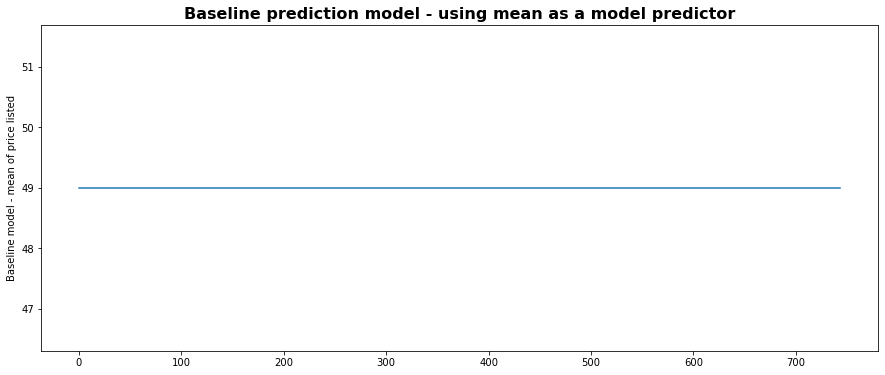

In [18]:
fig,ax = plt.subplots(figsize=(15,6))
ax.plot(baseline_preds)
ax.set_title("Baseline prediction model - using mean as a model predictor", size=16,fontweight='bold')
ax.set_ylabel("Baseline model - mean of price listed");

# 3. Interpret a Correlation Heatmap
**Analysis requirements: To develop a simple linear regression model, we will identify the independent variable that is most correlated with the dependent variable. To do this this we will plot a correlation heatmap to identify the variable most correlated with 'list_price'.**

We will reviewed this section through a series a steps (a-b) before we make an observation. 

## a) Correlation heatmap

Produce a heatmap showing the correlations between all of the chosen numeric columns in the data. We will be able to observe the correlations between the target/dependent (listing price) and other attributes.

In [19]:
#Import python liabraries
import seaborn as sns # correlation heat map

,prod_id,min_age,max_age,difficulty_level,piece_count,num_reviews,star_rating,list_price
prod_id,1.000000,0.018579,0.138579,-0.040951,0.203015,-0.035542,-0.073840,0.442360
min_age,0.018579,1.000000,0.546892,0.348324,0.624393,0.524501,0.056721,0.468382
max_age,0.138579,0.546892,1.000000,0.044568,0.366986,0.364293,0.055510,0.304641
difficulty_level,-0.040951,0.348324,0.044568,1.000000,0.461439,0.278958,0.092253,0.399360
piece_count,0.203015,0.624393,0.366986,0.461439,1.000000,0.544933,0.066226,0.861768
num_reviews,-0.035542,0.524501,0.364293,0.278958,0.544933,1.000000,-0.013999,0.423368
star_rating,-0.073840,0.056721,0.055510,0.092253,0.066226,-0.013999,1.000000,-0.004307
list_price,0.442360,0.468382,0.304641,0.399360,0.861768,0.423368,-0.004307,1.000000


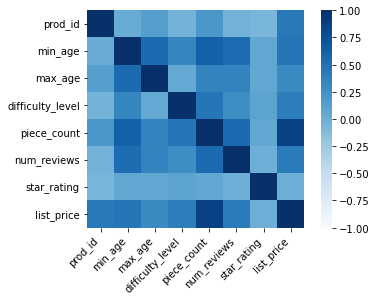

In [20]:
# create a dataframe of the numeric columns you wish to include in the correlation
dfnumeric = df[['prod_id','min_age','max_age','difficulty_level','piece_count','num_reviews','star_rating','list_price']]
corr = dfnumeric.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap = 'Blues',square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
corr

In [21]:
#most positively correlated feature
most_correlated_feature = train.piece_count

## b) Create a scatter plot to look for a linear relationship

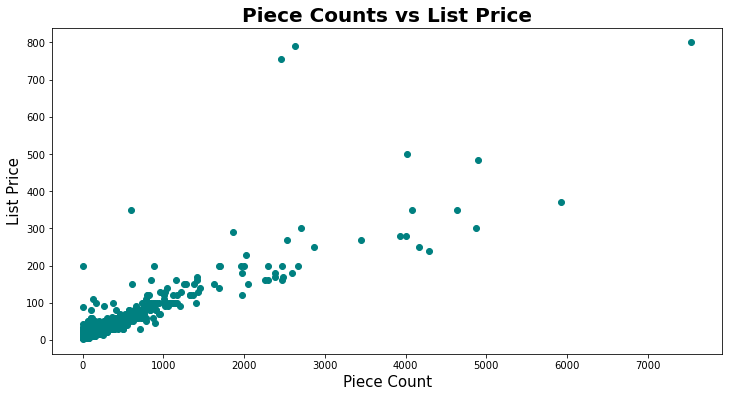

In [22]:
#visualise whether there appears to be a linear relationship
#between the most positively correlated feature and the dependent variable.

fig,ax = plt.subplots(figsize = (12,6))
ax.scatter(train.piece_count,train.list_price,color='teal');
ax.set_ylabel('List Price',size=15)
ax.set_xlabel('Piece Count', size=15)
ax.set_title('Piece Counts vs List Price',size=20,weight='bold');

## Observation 3:
The x and y axis labels in the above heatmap diagrams indicate the pair of values that are being compared, and then the color and the number represent the correlation. Based on the heatmap, we can observe that **'piece_count is most positively strongly correlated** with the target 'list_price'.

The above scatter plot shows a fairly clear linear relationship between piece_count and the list_price. It looks like we are ready to proceed with creating a simple linear regression model.

# 4. Build a Simple Linear Regression Model
**Analysis requirements; Now, create a linear regression model using the 'statsmodels' library where the most correlated feature is used as the independent variable and the dependent variable is properly set.** 

We will use the piece_count feature to predict list_price.

In [23]:
#fit a statsmodels linear regression model to the data and output a summary for the model.
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

f='list_price~piece_count'
model = smf.ols(formula=f,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2141.
Date:                Fri, 26 Aug 2022   Prob (F-statistic):          6.91e-221
Time:                        14:58:41   Log-Likelihood:                -3749.0
No. Observations:                 744   AIC:                             7502.
Df Residuals:                     742   BIC:                             7511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.4565      1.593      7.192      0.000       8.329      14.584
piece_count     0.0875      0.002     46.273      0.000       0.084       0.091
==============================================================================
Omnibus:                     1141.526   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           464258.231
Skew:                           8.756   Prob(JB):                         0.00
Kurtosis:                     124.117   Cond. No.                         978.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 5. Interpret the Simple Linear Regression Model
**Analysis requirements: Once the model has been fit, the coefficient for our independent variable, its p-value, and the coefficient confidence interval should be interpeted.  We should ask ourselves whether or not the relationship in the model seems plausible.**

Now that the model has been fit, we can interpret the model parameters. 

Specifically:
- What do the coefficients for the intercept and independent variable suggest about the dependent variable?
- Are the coefficients found to be statistically significant?
- What are the confidence intervals for the coefficients?
- Do the relationships found by the model seem plausible? 

MODEL: list_price = 11.4565  +  0.0875*piece_count + error

The intercept of 11.4565 represents the value of the list_price (in USD) when piece_count is zero.
The coefficient of 0.0875 is positive which implies each extra piece_count of lego has a positive impact on the list_price by on average USD0.0875.

The intercept has a t-statistic of 7.192 and piece_count has a t-stat of 46.273 these are a measure of how statistically significant the variables are. The larger the absolute value of the t-statistic the smaller the p-value, and the greater the evidence against the null hypothesis. The p-value tests the null hypothesis that the coefficient is zero. We can use a significance level of 0.05 or even 0.01 (both P values are 0.000). Given both P values are less than the alpha level we can reject the null hypothesis that the coefficients are zero. It is highly likely that piece_count has an impact on the list_price of lego. 

The F-statistic compares the joint effect of all the variables together. Given we have only one variable in this simple regression model this statistic doesn't add more value to our analysis beyond the t-stat and p-value.

Another measure of precision is the confidence interval. We have been given a 95% confidence interval in the model summary. We are 95% confident that the slope lies between 0.084 and 0.091. Values below the lower limit or above the upper limit are not excluded, but are not likely. With the confidence limit of 95%, each of these probabilities is only 2.5%. With regards to the intercept we are 95% confidence its value will lie between 8.329 and 14.584 

The R2 or coefficient of determination is .743 which means 74.3% of the variations in list price is explained by the independent variable piece count in our model.

The relationships found by the model appear plausible. While the initial scatter plot of count-piece vs price_list appear to highlight a positive linear relationship, the correlation coefficient confirms a strong positive relationship between both variables (alway being wary of causation). The regression appears to confirm the magnitude of the relationship as expressed by the slope. It would be reasonable to assume the number of pieces in lego would be a reflection of the listing price of the lego. Eventhough the magnitude of the slope of of x didn't appear large at 0.0875, however, it would not be unreasonable to have a 200 piece set of lego to be priced around USD28.95 (11.4565 + (0.0875 * 200). Clearly there are potentially other factors considered as having an impact on the listing price, even, the category factors & not just numeric dats in the database eg the various lego themes such as Starwars, City etc

The model summary produced more statistics on necessary assumptions of OLS which need be fulfilled in order to make reliable predictions or inferences from the model. These will be addressed later.

# 6. Evaluate the Simple Linear Regression Model.

**Analysis requirements: Before we can make a final assessment of the model, we need to compare its metrics with the baseline model created in section 2, and we will need to check the assumptions of linear regression.**

Given the model parameters have been interpreted, the model should be assessed based on predictive metrics and whether or not the model is meeting the assumptions of linear regression. 

We will reviewed this section through a series a steps (a-b). 

## a) Compare the $R^2$ and the Root Mean Squared Error of the simple linear regression model with the baseline model. 

In [24]:
model_r2 = r2_score(train.list_price, model.predict())

model_rmse = mean_squared_error(train.list_price, model.predict(), squared=False)

print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)
print('----------------------------')
print('Regression R^2: ', model_r2)
print('Regression RMSE:', model_rmse)

Baseline R^2:  0.0
Baseline RMSE: 73.60214730890442
----------------------------
Regression R^2:  0.7426440497844149
Regression RMSE: 37.33856230937886


### Interpret the model metrics

The baseline metrics have already been discussed, but will touch on them to help make a comparison between the two models.

R^2 of the baseline model generates a score of 0, which indicates an extremely poor model with 0% of the variation in list price being explained by baseline_preds. The best possible score any model can predict is 1.0. This constant model, where we have used the mean as the predictor, has disregarded any input features. We are not making any use of an independent x variable to predict a y variable. 

By comparison, when we have taken time to look at potential x variables and taken time to see if there is a linear relationship in the variables and correlation. We appear to have taken on a more reasonable variable in piece_count to help predict variability in line-price. (which shared as correlation of 0.86 with the y variable list_price (correlation squared is R2). The R2 or coefficient of determination is .743 which means 74.3% of the variations in list_price is explained by the independent variable piece_count in our model. This is a much improved result and the second regression appears to better fit the observed data.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors), which is basically a measure of how far from the regression line data points are. RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. While there is no correct value for RMSE, the lower the better and a zero score means the model is perfect.

RMSE has a direct relationship with the correlation coefficient. For example, if the correlation coefficient is 1, the RMSE will be 0, because all of the points lie on the regression line (and therefore there are no errors). The mean as a predictor would not have a strong correlation with the list price. The output value is in the same unit as the dependent variable (USD) so its relatively easy to interpret. This means that in general, the model’s predicted listing price is generally about USD73.60 off. This isn't great predictability as from the histogram from section 1 shows the majority of lego sets sell in the USD0 to USD100 bracket. Having used a more aimed approach in chosing the x variable for the second model the RMSE of 37.33 is a much lower result which tells you the data points are more concentrated around the line of best fit.

It's reasonable to assume that our second model is more suitable that our simple naieve base model and is worth pursuing further.

## b) Check the assumptions of simple linear regression
We will investigate 3 OLS assumptions of linearity, normality & homoscedasticity.

## b i) Investigating Linearity

First, let's check whether the linearity assumption holds.

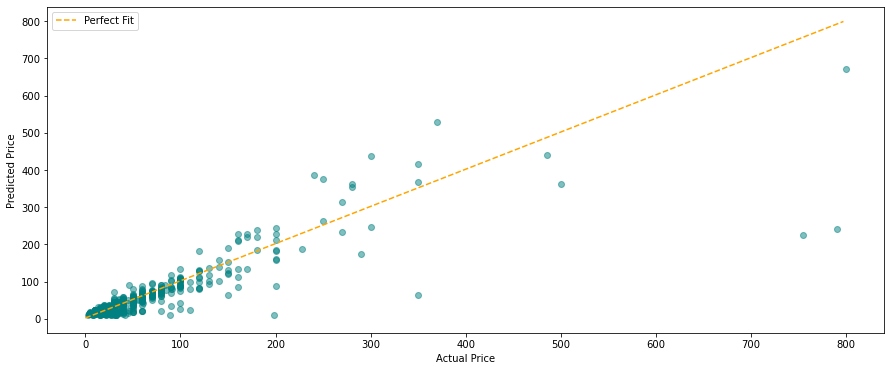

In [27]:
import numpy as np # Working with arrays

preds = model.predict()
fig, ax = plt.subplots(figsize=(15,6))

perfect_line = np.arange(df.list_price.min(), df.list_price.max())
ax.plot(perfect_line , linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.list_price, preds, alpha=0.5, color='teal')
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Are you violating the linearity assumption?

## b ii) Investigating Normality

Now let's check whether the normality assumption holds for our model.

/Users/Alma/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Alma/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


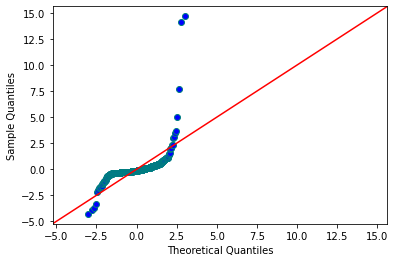

In [28]:
# Run this code without changes
import scipy.stats as stats
import statsmodels.api as sm

residuals = (df.list_price - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, color='teal');

Are you violating the normality assumption?

Residual Outliers: 
 Mean: -1.5607586907472363e-14 
 Max: 548.2046870979108 
 Min: -159.99089028725643 
 Std: 37.363680753060244


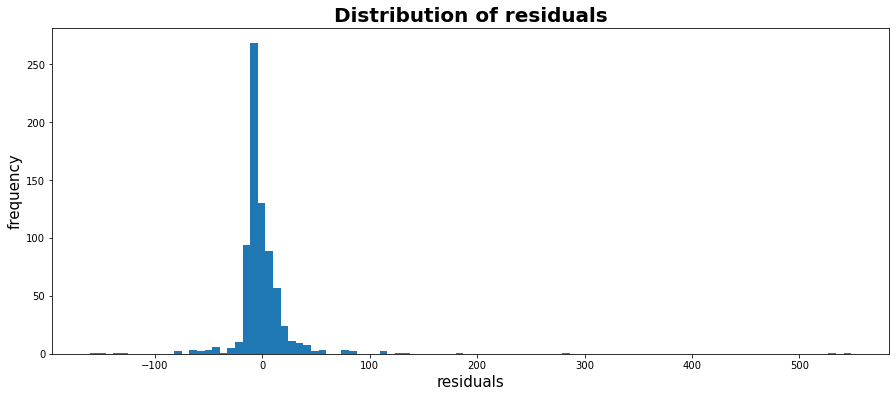

In [29]:
#Regression error histogram
residuals = (df.list_price - preds)
fig,ax = plt.subplots(figsize =(15,6))
ax.hist(residuals,bins=100)
ax.set_title('Distribution of residuals', size=20,weight='bold')
ax.set_xlabel('residuals', size=15)
ax.set_ylabel('frequency', size=15)
print('Residual Outliers:',"\n",'Mean:',residuals.mean(),'\n','Max:',residuals.max(),'\n','Min:',residuals.min(),
      '\n','Std:',residuals.std())

In [30]:
#Jacque-bera test
import statsmodels.stats.api as sms
name = ['jarque-bera','prob','skew','kurtosis']
test=sms.jarque_bera(model.resid)
list(zip(name,test))

[('jarque-bera', 464258.23116774356),
 ('prob', 0.0),
 ('skew', 8.756151004076566),
 ('kurtosis', 124.11726240106427)]

Normality requires the model residuals to follow a normal distribution, to draw a valid conclusions in hypothesis testing. This qqplot line should ideally be a straight line. This line is somewhat curved and suggests the residuals have a non-normal distribution. 

If we examine another graph of a histogram of the model residuals it is noticable there are large outliers in the residuals. The range from min to max outlier is large which supports a large standard deviation in the data. This does not support the normality in the Outliers: 
 Mean: -1.5607586907472363e-14 
 Max: 548.2046870979108 
 Min: -159.99089028725643 
 Std: 37.363680753060244

Jarque-Bera, which is a statistical test for normality. This is specifically a test that determines whether the data tested for skewness and kurtosis follows a normal distribution. The value for JB test is 464258.231. if JB is far from zero, it indicates that the data does not have a normal distribution, our number is significantly higher. The P value is 0.0 which would lead us to reject the null hypothesis. The null hypothesis for the test is that the data is normally distributed; the alternate hypothesis is that the data does not come from a normal distribution. We have a kurtosis of 124.11726, which is significantly higher than 3 and this would indicate heavier tails in the data over a normal distribution. Our skewness value of 8.756 indicates our data is skewed. A normal distribution should have a skewness of zero. Failing the normality test allows us to state with 95% confidence the data does not fit the normal distribution.

[('jarque-bera', 464258.23116774386),
 ('prob', 0.0),
 ('skew', 8.75615100407657),
 ('kurtosis', 124.1172624010643)]

## b iii) Investigating Homoscedasticity

Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

ax.scatter(preds, residuals, alpha=0.5, color='teal')
ax.plot(preds, [0 for i in range(len(df))])
ax.set_xlabel("Predicted Value",size=15)
ax.set_ylabel("Actual - Predicted Value",size=15)
ax.set_title("Are the model's errors homoscedastic or is there a pattern forming? ",size=20,weight='bold');

Are we violating the homoscedasticity assumption?

In [ ]:
#Breusch pagan & Whites Test to test for null hypothesis of homoscedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

bp_test = sms.het_breuschpagan(model.resid, model.model.exog)
white_test = sms.het_white(model.resid, model.model.exog)

labels = ['LM Statistic','LM-Test p-value','F-Statistic','F-Test p-value']
labels_WT = ['LM Statistic','LM-Test p-value','F-Statistic','F-Test p-value']

print("BP TEST:",'\n',list(zip(labels,bp_test)))
print("WHITE TEST:",'\n',list(zip(labels,white_test)))

homoscedaticity suggests your residual should be constant and not increasing or increasing.
There appears to be some pattern forming as we move beyond the $200 price line bracket, it may well be due to an important variable being omitted from the modelling, more than just the outliers present in the data. We have used some statistical tests - Breusch pagan & Whites Test to test further for the null hypothesis of homoscedasticity.

Focusing on the F-stat for both tests the F-stats are reasonably large from each test which would indicate the variances are different. The p value for both tests are below zero and using an alpha of 0.05 the p values indicate that we should reject the null hypothesis of homoscedasticity.


# Overall Observation: Linear Regression Assumptions Conclusion

Given your answers above, how should we interpret our model's coefficients? Do we have a model that can be used for inferential as well as predictive purposes? What might our next steps be?

The model of using piece_count results in a good R2 value for the model, and proves to be significantly better than the naieve base model.However, there are outliers which may solely be the reason for heterscedastic & non normality in the residuals and presenting an extremely clear linear relationship.

The presence of outliers can impact the model and as such it can change the magnitude of the coefficients and standard errors in the models (reducing the ability to trust hypothese testing). Visually you can see from our previous scatter plot outliers (piece count vs line_price section 2)) definately effect the slope of the best fit line ie the coefficients. 
It’s clearly important to understand how outliers occur, errors in data (often human) should be amended/removed or replaced with perhaps a mean/median value where possible. However, there are outliers that can be actual & authentic, should these be removed or should we give them further consideration?. To remove them will most possibly improve the statistical results of the model - then is this really the correct predictive model. More investigative into the variations needs to occur.

Outliers can have an impact on homoscedasticity making it heterscedastic. The outliers distort the statistic tests such that the results are incorrect. Outliers can also impact the normality of residuals leaving you with biased estimates & inaccurate inference.

Given OLS requires the assumptions of normality and homoscedasticity (along with linearity & more) it is imperative that these concerns are address in order to make the model more predictable & potentially less biased. One of the big issues with nonnormal errors and heteroscedasticity is that the predictive ability of piece count is not the same across the full length of the price listing data points variable. This makes the model difficult to interpretate.

Other than addressing the outliers which may resolve issues in the residuals of heterscedasticity and non normality, there are options of changing the data format. While this type of model must be linear in the coefficients, you could potentially consider transforning X, Y or both variables. eg raising a variable by an exponent, doing a log transformation or using inverse. Transforming the data, however, makes understanding the model more difficult.

Beyond statistics the idea that the piece count in a lego set is a determining factor in the listing price is comprehensible. Clearly there are other variables which could be considered (bearing in mind you should never overfit the model) to better fit the model. Looking at other variables available in database the themed lego category is of interest to consider (Excluding an important variable in a model can also result in homoscedasticity). This Theme variable is currently nominal catergorical data so some thought would need to as best way to convert this column. We could consider some dummy encoding (ensuring your define your themes well ie binning your themes to avoid adding too many dummy variables in the model).A simpler was to commence this process and to validate if theme was a variable to introduce into the model we could commence by running 2 regressions parrallell such as a theme using "City lego" vs a theme using "Technic lego" and see if there was a difference in the model outcomes and the new variables were significant and added diffferent degrees of magnitude to the models.

I would conclude that, although this is a great start to regression modelling, the coefficients are currently biased, which leads to lack of ability to inference an accurate relationship between piece_count and list_price or being able to plug values into the model to predict a value for list_price. First step is to start handling the outliers. Assuming they were to be removed there is a high chance that the assumptions of an OLS may then be nolonger violated.
